<a href="https://colab.research.google.com/github/Indahrisma/data-analytics-code/blob/new/EDA_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

In [ ]:
fpi = pd.read_csv("Food_Production.csv")
fpi.head()

Food product  Land use change  Animal Feed  Farm  Processing  \
0  Wheat & Rye (Bread)              0.1          0.0   0.8         0.2   
1         Maize (Meal)              0.3          0.0   0.5         0.1   
2        Barley (Beer)              0.0          0.0   0.2         0.1   
3              Oatmeal              0.0          0.0   1.4         0.0   
4                 Rice              0.0          0.0   3.6         0.1   

   Transport  Packging  Retail  Total_emissions  \
0        0.1       0.1     0.1              1.4   
1        0.1       0.1     0.0              1.1   
2        0.0       0.5     0.3              1.1   
3        0.1       0.1     0.0              1.6   
4        0.1       0.1     0.1              4.0   

   Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)  ...  \
0                                                NaN         ...   
1                                                NaN         ...   
2                                                NaN         ...   
3                                           4.281357         ...   
4                                           9.514379         ...   

   Freshwater withdrawals per 100g protein (liters per 100g protein)  \
0                                                NaN                   
1                                                NaN                   
2                                                NaN                   
3                                         371.076923                   
4                                        3166.760563                   

   Freshwater withdrawals per kilogram (liters per kilogram)  \
0                                                NaN           
1                                                NaN           
2                                                NaN           
3                                              482.4           
4                                             2248.4           

   Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)  \
0                                                NaN              
1                                                NaN              
2                                                NaN              
3                                           0.945482              
4                                           1.207271              

   Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)  \
0                                                NaN                      
1                                                NaN                      
2                                                NaN                      
3                                           1.907692                      
4                                           6.267606                      

   Land use per 1000kcal (m² per 1000kcal)  \
0                                      NaN   
1                                      NaN   
2                                      NaN   
3                                 2.897446   
4                                 0.759631   

   Land use per kilogram (m² per kilogram)  \
0                                      NaN   
1                                      NaN   
2                                      NaN   
3                                      7.6   
4                                      2.8   

   Land use per 100g protein (m² per 100g protein)  \
0                                              NaN   
1                                              NaN   
2                                              NaN   
3                                         5.846154   
4                                         3.943662   

   Scarcity-weighted water use per kilogram (liters per kilogram)  \
0                                                NaN                
1                                                NaN                
2                                                NaN                
3                     

In [ ]:
fpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 23 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Food product                                                             43 non-null     object 
 1   Land use change                                                          43 non-null     float64
 2   Animal Feed                                                              43 non-null     float64
 3   Farm                                                                     43 non-null     float64
 4   Processing                                                               43 non-null     float64
 5   Transport                                                                43 non-null     float64
 6   Packging                                                                 43 

In [ ]:
fpi = pd.read_csv("Food_Production.csv",
                 index_col = 'Food product')

columns_to_delete = ['Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)',
                    'Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)',
                    'Freshwater withdrawals per 1000kcal (liters per 1000kcal)',
                    'Freshwater withdrawals per 100g protein (liters per 100g protein)',
                    'Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)',
                    'Land use per 1000kcal (m² per 1000kcal)',
                    'Land use per 100g protein (m² per 100g protein)',
                    'Scarcity-weighted water use per 100g protein (liters per 100g protein)',
                    'Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)']

fpi = fpi.drop(columns=columns_to_delete)

# Replace the columns headers having spaces in between the words
fpi.rename(columns = {'Land use change': 'LandUseChange', 
                     'Animal feed': 'AnimalFeed',
                     'Total_emissions': 'TotalEmissions'}, 
            inplace = True)

# Replace the columns headers with a very long name with a shorter name
fpi.rename(columns = {'Eutrophying emissions per kilogram (gPO₄eq per kilogram)': 'EutrophyingEmissions',
                     'Freshwater withdrawals per kilogram (liters per kilogram)': 'FreshwaterWithdrawals',
                     'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)': 'GreenhouseGasEmissions',
                     'Land use per kilogram (m² per kilogram)': 'LandUse',
                     'Scarcity-weighted water use per kilogram (liters per kilogram)': 'ScarcityWeightedWaterUse'}, 
          inplace = True)

fpi.head(10)

LandUseChange  Animal Feed  Farm  Processing  Transport  \
Food product                                                                   
Wheat & Rye (Bread)            0.1          0.0   0.8         0.2        0.1   
Maize (Meal)                   0.3          0.0   0.5         0.1        0.1   
Barley (Beer)                  0.0          0.0   0.2         0.1        0.0   
Oatmeal                        0.0          0.0   1.4         0.0        0.1   
Rice                           0.0          0.0   3.6         0.1        0.1   
Potatoes                       0.0          0.0   0.2         0.0        0.1   
Cassava                        0.6          0.0   0.2         0.0        0.1   
Cane Sugar                     1.2          0.0   0.5         0.0        0.8   
Beet Sugar                     0.0          0.0   0.5         0.2        0.6   
Other Pulses                   0.0          0.0   1.1         0.0        0.1   

                     Packging  Retail  TotalEmissions  EutrophyingEmissions  \
Food product                                                                  
Wheat & Rye (Bread)       0.1     0.1             1.4                   NaN   
Maize (Meal)              0.1     0.0             1.1                   NaN   
Barley (Beer)             0.5     0.3             1.1                   NaN   
Oatmeal                   0.1     0.0             1.6                 11.23   
Rice                      0.1     0.1             4.0                 35.07   
Potatoes                  0.0     0.0             0.3                  3.48   
Cassava                   0.0     0.0             0.9                  0.69   
Cane Sugar                0.1     0.0             2.6                 16.92   
Beet Sugar                0.1     0.0             1.4                  5.41   
Other Pulses              0.4     0.0             1.6                 17.08   

                     FreshwaterWithdrawals  GreenhouseGasEmissions  LandUse  \
Food product                                                                  
Wheat & Rye (Bread)                    NaN                     NaN      NaN   
Maize (Meal)                           NaN                     NaN      NaN   
Barley (Beer)                          NaN                     NaN      NaN   
Oatmeal                              482.4                0.945482     7.60   
Rice                                2248.4                1.207271     2.80   
Potatoes                              59.1                0.628415     0.88   
Cassava                                0.0                1.355236     1.81   
Cane Sugar                           620.1                0.911681     2.04   
Beet Sugar                           217.7                0.515670     1.83   
Other Pulses                         435.7                0.524927    15.57   

                     ScarcityWeightedWaterUse  
Food product                                   
Wheat & Rye (Bread)                       NaN  
Maize (Meal)                              NaN  
Barley (Beer)                             NaN  
Oatmeal                               18786.2  
Rice                                  49576.3  
Potatoes                               2754.2  
Cassava                                   0.0  
Cane Sugar                            16438.6  
Beet Sugar                             9493.3  
Other Pulses                          22477.4

In [ ]:
# Replace the NaN with 0
fpi= fpi.fillna(0)

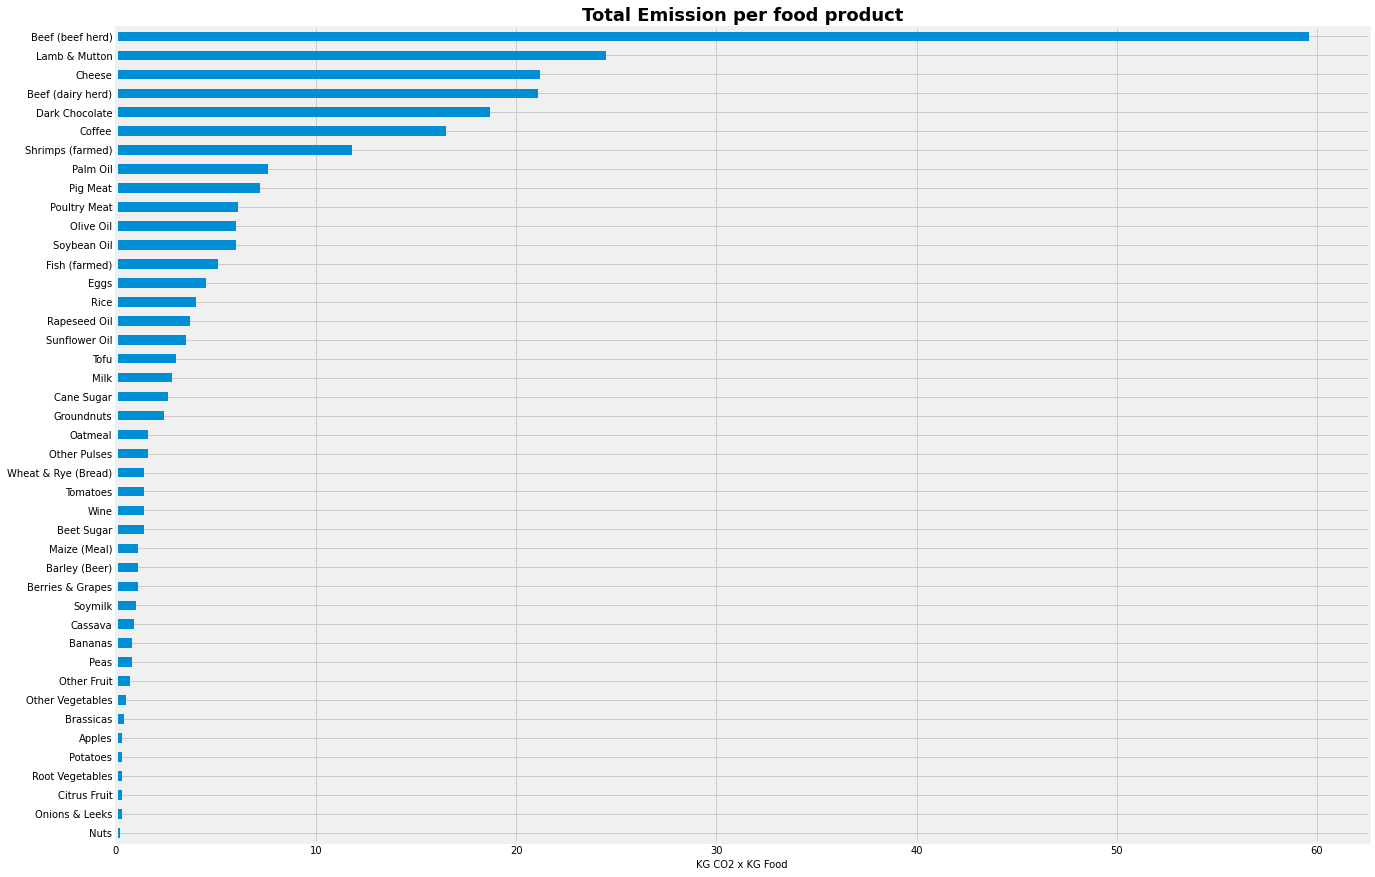

In [ ]:
fpi= fpi.sort_values(['TotalEmissions'])

plt.subplots(figsize = (20,15))

fpi.TotalEmissions.plot(kind = 'barh')

plt.title('Total Emission per food product',fontsize = 18, fontweight = "bold")
plt.xlabel('KG CO2 x KG Food',fontsize = 10)
plt.ylabel('')

plt.show()

In [ ]:
# Fuction that normalize the data by converting values in range [0,1]
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

# Define the colors palette to be used on pie charts
colors = sns.color_palette('pastel')[0:7]

# Workaround to insert labels into a LEGEND and not on the pie chart (useful to avoid text overlapping)
labels = ['LandUseChange','AnimalFeed','Farm','Processing','Transport','Packaging','Retail']
unit = ['Kg CO2']*7
legend_labels = ['{0} ({1})'.format(i,j) for i,j in zip(labels,unit)]

fig = plt.figure(figsize = (60,320))

# Iterates over row index (=type of food product)
count = 0

for row_index, row in fpi.iterrows():
    
    count +=1
    
    data = NormalizeData(row[0:7])
    
    ax = fig.add_subplot(15,3,count)
    
    wedges, label, autopct = ax.pie(data, colors = colors, autopct = '%0.0f%%', startangle=90)

    plt.setp(autopct, size=42)
    plt.setp(label, size=0)

    # Display the LEGEND every 3 pie charts
    if ((count-1)%3==0):
        plt.legend(wedges,legend_labels,loc='upper left',bbox_to_anchor=(-0.65, 1.),fontsize=40, title="LEGEND", title_fontsize=44)

    ax.set_title(row_index,fontsize = 48, fontweight = "bold")

In [9]:
# loading of a dataframe from seaborn
df = fpi.loc[:, 'EutrophyingEmissions' : 'ScarcityWeightedWaterUse']
df.stack()  

Food product                              
Nuts              EutrophyingEmissions            19.150000
                  FreshwaterWithdrawals         4133.800000
                  GreenhouseGasEmissions           0.069919
                  LandUse                         12.960000
                  ScarcityWeightedWaterUse    229889.800000
                                                  ...      
Beef (beef herd)  EutrophyingEmissions           301.410000
                  FreshwaterWithdrawals         1451.200000
                  GreenhouseGasEmissions          36.439560
                  LandUse                        326.210000
                  ScarcityWeightedWaterUse     34732.500000
Length: 215, dtype: float64

In [10]:
df.describe(include="all")

EutrophyingEmissions  FreshwaterWithdrawals  GreenhouseGasEmissions  \
count             43.000000              43.000000               43.000000   
mean              40.776047             824.162791                4.323724   
std               79.151355            1254.370907                9.572196   
min                0.000000               0.000000                0.000000   
25%                2.350000              43.750000                0.176578   
50%               10.650000             369.800000                0.911681   
75%               36.165000             833.950000                4.196842   
max              365.290000            5605.200000               50.946429   

          LandUse  ScarcityWeightedWaterUse  
count   43.000000                 43.000000  
mean    25.861628              32350.751163  
std     74.279031              54701.845169  
min      0.000000                  0.000000  
25%      0.730000                943.800000  
50%      2.420000              10593.700000  
75%     12.590000              31340.350000  
max    369.810000             229889.800000

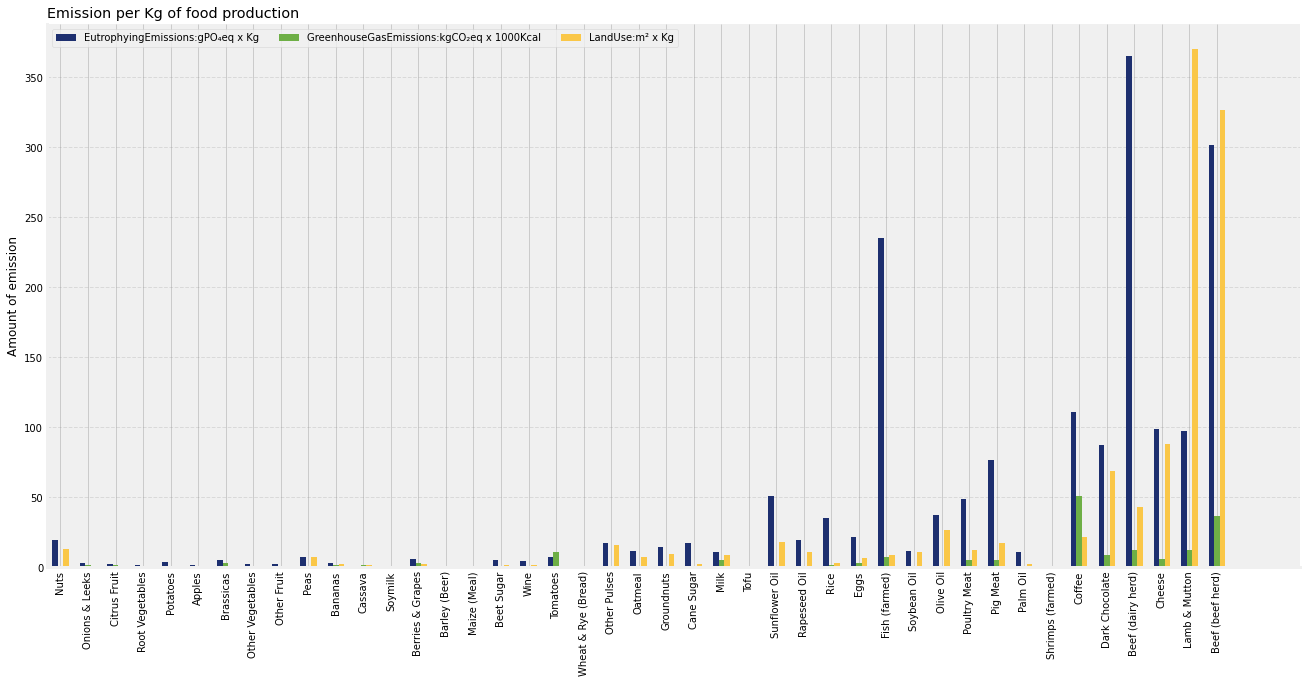

In [11]:
# define figure
fig, ax = plt.subplots(1, figsize=(20, 10))
# numerical x
x = np.arange(0, len(df.index))
# plot bars
plt.bar(x - 0.2, df['EutrophyingEmissions'], width = 0.2, color = '#1D2F6F')
plt.bar(x + 0.0, df['GreenhouseGasEmissions'], width = 0.2, color = '#6EAF46')
plt.bar(x + 0.2, df['LandUse'], width = 0.2, color = '#FAC748')
# remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# x y details
plt.ylabel('Amount of emission')
plt.xticks(ticks=range(len(df.index)), labels=df.index, rotation=90 )
plt.xlim(-0.5, 45)
# grid lines
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.2)
# title and legend
plt.title('Emission per Kg of food production', loc ='left')
plt.legend(['EutrophyingEmissions:gPO₄eq x Kg', 'GreenhouseGasEmissions:kgCO₂eq x 1000Kcal', 'LandUse:m² x Kg'], loc='upper left', ncol = 3)
plt.show()

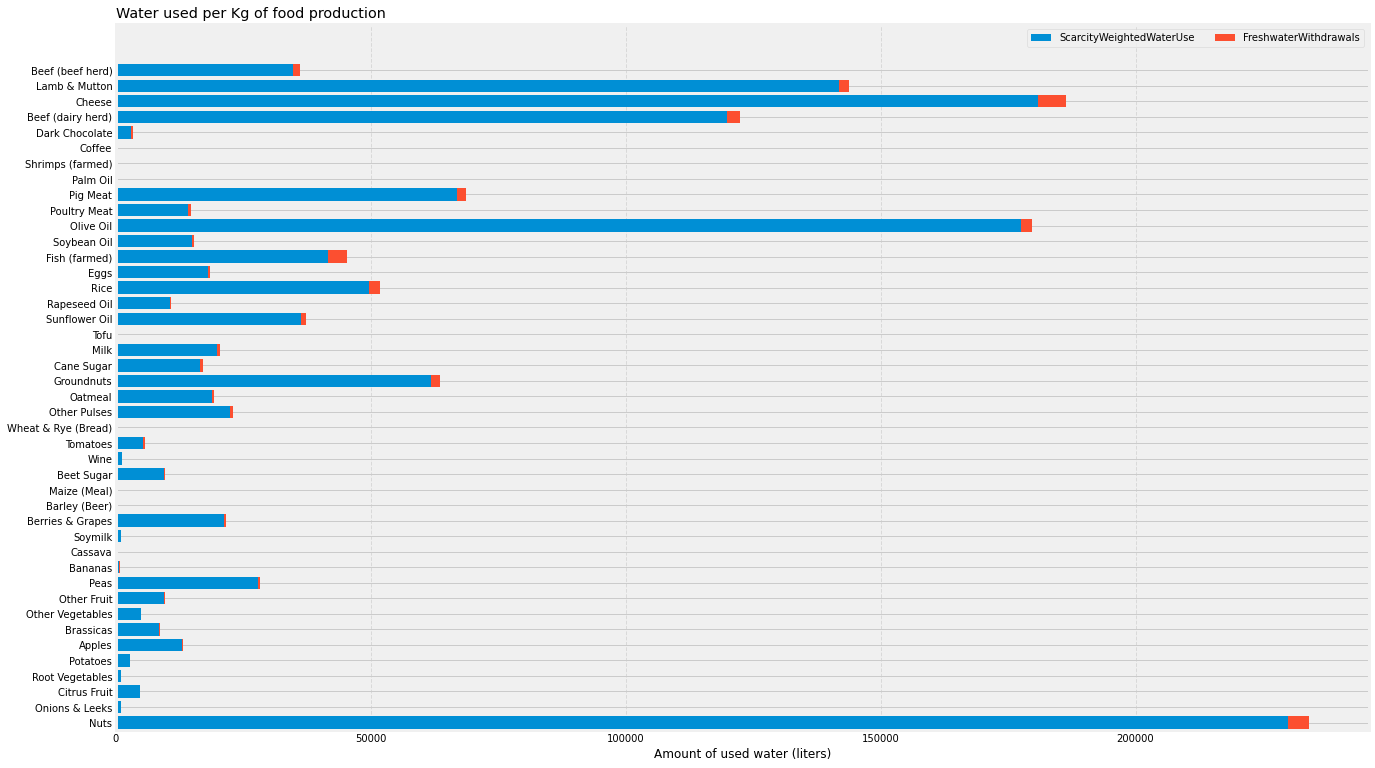

In [12]:
# define figure
fig, ax = plt.subplots(1, figsize=(20, 13))
# numerical x
x = np.arange(0, len(df.index))

# plot horizontal bars
plt.barh(x, df['ScarcityWeightedWaterUse'])
plt.barh(x, df['FreshwaterWithdrawals'], left = df['ScarcityWeightedWaterUse'])

# x y details
plt.xlabel('Amount of used water (liters)')
plt.yticks(ticks=range(len(df.index)), labels=df.index)
plt.ylim(-0.5, 45)

# grid lines
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed', alpha=0.2)

# title and legend
plt.title('Water used per Kg of food production', loc ='left')
plt.legend(['ScarcityWeightedWaterUse','FreshwaterWithdrawals'], loc='upper right', ncol = 2)
plt.show()

In [13]:
fpi['TotalEmissions'].describe(include = "all")

count    43.000000
mean      5.972093
std      10.501753
min       0.200000
25%       0.850000
50%       1.600000
75%       6.000000
max      59.600000
Name: TotalEmissions, dtype: float64

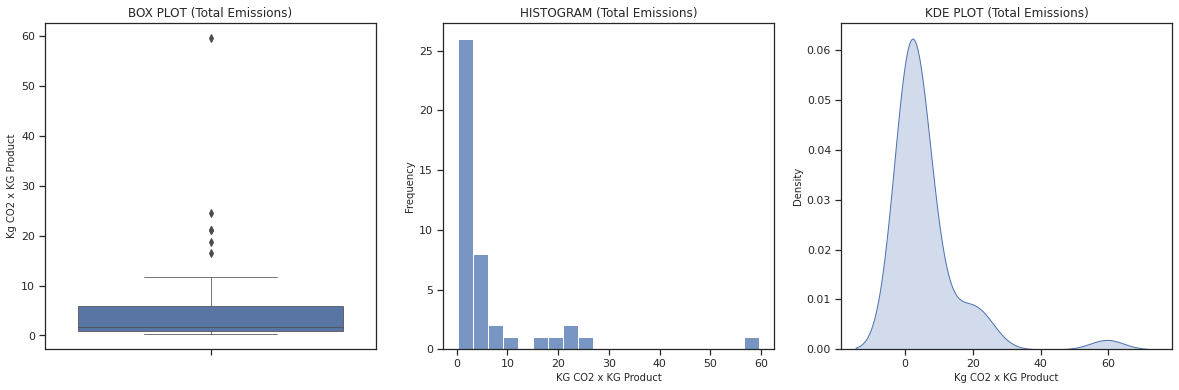

In [14]:
sns.set_theme(style="white")
sns.set_style("ticks")

plt.figure(figsize=(18,6))

plt.subplot(131)

box = sns.boxplot(y = "TotalEmissions", data=fpi, orient = "v", linewidth=0.75)
#box = sns.swarmplot(y = "TotalEmissions", data=fpi, color=".25")

box.set_ylabel("Kg CO2 x KG Product",fontsize = 10)
box.set_title("BOX PLOT (Total Emissions)")

plt.subplot(132)

hist = sns.histplot(fpi['TotalEmissions'], bins = 20)

hist.set_title("HISTOGRAM (Total Emissions)")
hist.set_xlabel("KG CO2 x KG Product",fontsize = 10)
hist.set_ylabel("Frequency",fontsize = 10)

plt.subplot(133)

kde = sns.kdeplot(fpi['TotalEmissions'],
                   shade = True,
                   color = "b")

kde.set_title("KDE PLOT (Total Emissions)")
kde.set_xlabel("Kg CO2 x KG Product",fontsize = 10)
kde.set_ylabel("Density",fontsize = 10)

plt.show()

In [15]:
df_stat = fpi.loc[:, 'TotalEmissions' : 'ScarcityWeightedWaterUse']
df_stat.head()

TotalEmissions  EutrophyingEmissions  FreshwaterWithdrawals  \
Food product                                                                   
Nuts                        0.2                 19.15                 4133.8   
Onions & Leeks              0.3                  3.24                   14.3   
Citrus Fruit                0.3                  2.24                   82.7   
Root Vegetables             0.3                  1.61                   28.4   
Potatoes                    0.3                  3.48                   59.1   

                 GreenhouseGasEmissions  LandUse  ScarcityWeightedWaterUse  
Food product                                                                
Nuts                           0.069919    12.96                  229889.8  
Onions & Leeks                 1.351351     0.39                     932.0  
Citrus Fruit                   1.218750     0.86                    4662.7  
Root Vegetables                1.162162     0.33                     929.2  
Potatoes                       0.628415     0.88                    2754.2

In [16]:
df_stat.corr()

TotalEmissions  EutrophyingEmissions  \
TotalEmissions                  1.000000              0.751377   
EutrophyingEmissions            0.751377              1.000000   
FreshwaterWithdrawals           0.334524              0.522032   
GreenhouseGasEmissions          0.699204              0.595589   
LandUse                         0.824595              0.522653   
ScarcityWeightedWaterUse        0.268910              0.345495   

                          FreshwaterWithdrawals  GreenhouseGasEmissions  \
TotalEmissions                         0.334524                0.699204   
EutrophyingEmissions                   0.522032                0.595589   
FreshwaterWithdrawals                  1.000000                0.110238   
GreenhouseGasEmissions                 0.110238                1.000000   
LandUse                                0.287596                0.498148   
ScarcityWeightedWaterUse               0.855976                0.045816   

                           LandUse  ScarcityWeightedWaterUse  
TotalEmissions            0.824595                  0.268910  
EutrophyingEmissions      0.522653                  0.345495  
FreshwaterWithdrawals     0.287596                  0.855976  
GreenhouseGasEmissions    0.498148                  0.045816  
LandUse                   1.000000                  0.358504  
ScarcityWeightedWaterUse  0.358504                  1.000000

In [17]:
df_stat.cov()

TotalEmissions  EutrophyingEmissions  \
TotalEmissions                110.286822          6.245657e+02   
EutrophyingEmissions          624.565744          6.264937e+03   
FreshwaterWithdrawals        4406.713699          5.182998e+04   
GreenhouseGasEmissions         70.287335          4.512491e+02   
LandUse                       643.233808          3.072827e+03   
ScarcityWeightedWaterUse   154479.736700          1.495899e+06   

                          FreshwaterWithdrawals  GreenhouseGasEmissions  \
TotalEmissions                     4.406714e+03               70.287335   
EutrophyingEmissions               5.182998e+04              451.249110   
FreshwaterWithdrawals              1.573446e+06             1323.632365   
GreenhouseGasEmissions             1.323632e+03               91.626932   
LandUse                            2.679629e+04              354.190158   
ScarcityWeightedWaterUse           5.873399e+07            23990.252463   

                               LandUse  ScarcityWeightedWaterUse  
TotalEmissions            6.432338e+02              1.544797e+05  
EutrophyingEmissions      3.072827e+03              1.495899e+06  
FreshwaterWithdrawals     2.679629e+04              5.873399e+07  
GreenhouseGasEmissions    3.541902e+02              2.399025e+04  
LandUse                   5.517374e+03              1.456673e+06  
ScarcityWeightedWaterUse  1.456673e+06              2.992292e+09

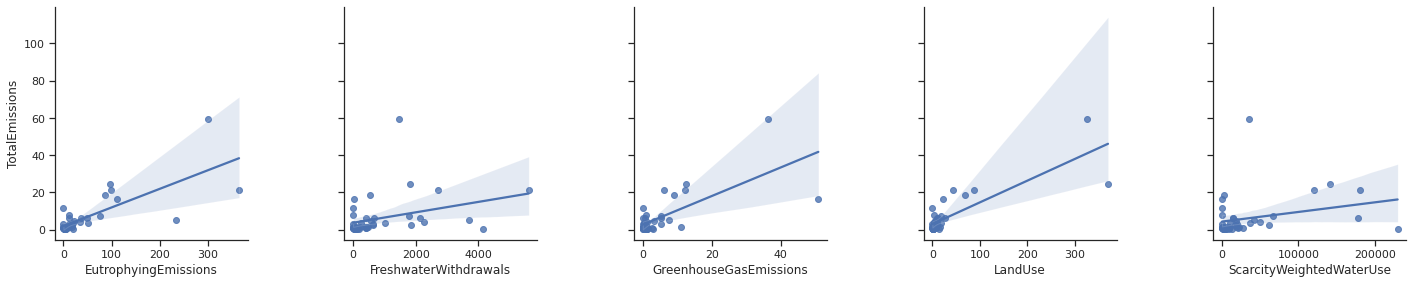

In [18]:
pairplot = sns.pairplot(df_stat,
                        height = 4,
                        aspect = 1,
                        
                        x_vars = ["EutrophyingEmissions","FreshwaterWithdrawals", 
                                  "GreenhouseGasEmissions", "LandUse",
                                  "ScarcityWeightedWaterUse"],
                        
                        y_vars = ["TotalEmissions"],
                        
                        kind = "reg")

pairplot.fig.subplots_adjust(wspace = 0.5 , hspace = 0.1)

plt.show()

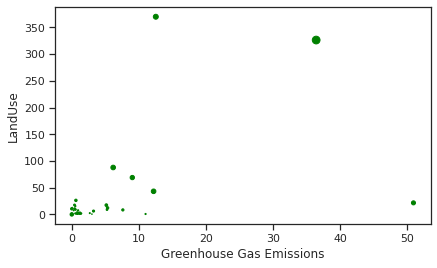

In [19]:
plt.scatter(x = fpi['GreenhouseGasEmissions'],
            y = fpi['LandUse'], 
            color='green', 
            marker='o', 
            s=fpi['TotalEmissions'])
plt.xlabel('Greenhouse Gas Emissions')
plt.ylabel('LandUse')

plt.show()